# Day 3 Notebook
This notebook contains two exercises: building and training a CNN with image data from CIFAR10 and building and training an RNN for text classification.

## Part 1: Convolutional Neural Networks

### Classifying Images
In this exercise we'll build a CNN to classify images from the [CIFAR benchmark dataset](https://www.cs.toronto.edu/~kriz/cifar.html). This lesson is adapted from the [Keras Tutorial](https://www.tensorflow.org/tutorials/images/cnn)

In [ ]:
#import libraries
!pip install --ignore-installed --upgrade tensorflow==2.2.0
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

  Using cached tensorflow-2.2.0-cp38-cp38-macosx_10_11_x86_64.whl (175.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached scipy-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.35.0-cp38-cp38-macosx_10_10_x86_64.whl (3.8 MB)
  Using cached h5py-2.10.0-cp38-cp38-macosx_10_9_x86_64.whl (3.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.14.0-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached cachetools-4.2.1

Now we'll download the CIFAR10 dataset. This dataset contains 60,000 color images in 10 classes, divided into 50,000 training images and 10,000 validation images. The 10 classes are all mutually exclusive so there is no overlap in the labeling. 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Let's take a look at the first 25 images in the training dataset and their corresponding labels:

In [ ]:
# create a map of the class names (instead of numerical labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Now we can start building our model! We'll define three sets of Convolutional and MaxPooling layers.  

The CNN will take input tensors (3D matrices) of shape (image_height, image_width, color_channels). For the CIFAR10 dataset the images are 32x32 pixels with the standard 3 color channels (RGB) so the input dimensions will be (32, 32, 3).

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

We can use the `model.summary()` function to see if our CNN looks the way we expect:

In [ ]:
model.summary()

From this model summary we see that indeed we have three convolutional layers, the first learns 32 filters of size 3x3 and the next two each leran 64 filters of size 3x3. Typically, as your image representations get smaller (in deeper layers of the network) you can have more learnable filters because there is less computational power required to apply the filters.

To complete our model, we need to add dense layers that will take the new image representations from our convolutions and perform the classification on them. Standard dense layers take input vectors (which are 1D) so we'll have to flatten our 3D image representations into a vector for input. As a reminder, CIFAR10 has 10 classes, so our final output layer should have 10 nodes.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

here's our complete model! 

In [ ]:
model.summary()

Now we can train our model! 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

And evaluate it

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

Nice! We get a pretty good accuracy with a pretty basic CNN! Try some of the exercises below

**Exercise:** Adjust one of more hyperparameters of your CNN (examples: filter size, number of layers, pooling function, learning rate, etc) and compare the performance to the network we built above

In [ ]:
## POSSIBLE SOLUTION: changing the pooling method
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.AveragePooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print("test acc 1st network:",test_acc, "test acc 2nd network:",test_acc2)

We can also take a look at the layers of our CNN. Each layer has a `layer_name` property where the individual layers have naming conventions like 'block#conv#' where the # is a integer. We can also use `get_weights` to get the actual weight values of the features.

In [ ]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)


**Exercise:** Visualize the filters in the first convolutional layer (Note, you should normalize the values to be between 0 and 1). Can you make any inferences about them?

In [ ]:
##SOLUTION
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Part Two: Recurrent Neural Networks

Now we'll train an RNN on text data. This lesson is adapted from the [Keras Tutorial](https://www.tensorflow.org/tutorials/text/text_classification_rnn)

In [3]:
pip install -q tensorflow_datasets

ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/Users/sthais/miniconda2/envs/wintersession/lib/python3.7/site-packages/absl_py-0.11.0.dist-info/METADATA'

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [4]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

We'll use data from the [IMDB large movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/). This is a binary classification dataset where each review has been labeled as experessing either a positive or negative sentiment. 

In [15]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Let's take a look at a sample review: 

In [16]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'I saw this movie in its own time period, when having a baby out of wedlock not only ruined your life, but stamped your child as a bastard. In these days of \'single mothers\' that may seem very far-fetched, but it was very true. And I\'m not crazy about laughing at someone who is stammering, either. Between these two problems I had difficulty finding this movie funny. At that time I didn\'t know who had directed it or what a marvelous reputation he had. I did know who Betty Hutton was, and she just made me nervous because she was so frenetic. I loved "Bringing Up Baby", but I find this movie just embarrassing. I\'m sure the punch at some church functions probably was spiked, but I was the one needing a drink after watching this again. The idea the girl would have to be drunk in order to \'get married\' and get pregnant just added to the misery. An entire town could turn on you under these circumstances, so the outcome of this movie is really the funny part. Of course, shoot 

Now we need to create a text encoder. We can use the Keras `experimental.preprocessing.TextVectorization` to do this transformation.

In [19]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

We can take a look at the top 20 most common words in the dataset

In [20]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array([b'the', b'and', b'a', b'of', b'to', b'is', b'in', b'it', b'i',
       b'this', b'that', b'br', b'was', b'as', b'for', b'with', b'movie',
       b'but', b'film', b'on'], dtype='|S14')

Once the vocabulary is set the layer encodes the text into numerical indices. Each review will now be a tensor and each tensor is 0-padded to the length of the longest review in the dataset (unless we specify a fixed `output_sequence_length`).

In [32]:
encoded_example = encoder(example.numpy()[:3])
encoded_example

InvalidArgumentError: Tried to squeeze dim index 1 for tensor with 1 dimensions. [Op:Squeeze]

In [13]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'What\'s up with Robert "Pretentious" Altman? Was he saving on lighting? Everything was so dark in this boring movie that it was laughable. I mean, have you ever seen a lawyer\'s office where everyone works by candlelight?<br /><br />Don\'t waste your time. In fact, don\'t waste your time with anything Altman makes: It\'s all a pretentious waste of film.'


NameError: name 'encoded_example' is not defined

We'll implement a model with the following architecture: 

1. This model can be build as a tf.keras.Sequential.

2. The first layer is the encoder, which converts the text to a sequence of token indices.

3. After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

4. A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

The tf.keras.layers.Bidirectional wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output.

The main advantage to a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.

The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

5. After the RNN has converted the sequence to a single vector the two layers.Dense do some final processing, and convert from this vector representation to a single logit as the classification output.

In [35]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [36]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [37]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10


InvalidArgumentError:  indices[47,117] = 1000 is not in [0, 999)
	 [[node sequential/embedding/embedding_lookup (defined at <ipython-input-37-7944b517869f>:3) ]] [Op:__inference_train_function_13853]

Function call stack:
train_function


In [38]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

InvalidArgumentError:  indices[10,319] = 999 is not in [0, 999)
	 [[node sequential/embedding/embedding_lookup (defined at <ipython-input-38-0556d3299cc6>:1) ]] [Op:__inference_test_function_17362]

Function call stack:
test_function


NameError: name 'history' is not defined

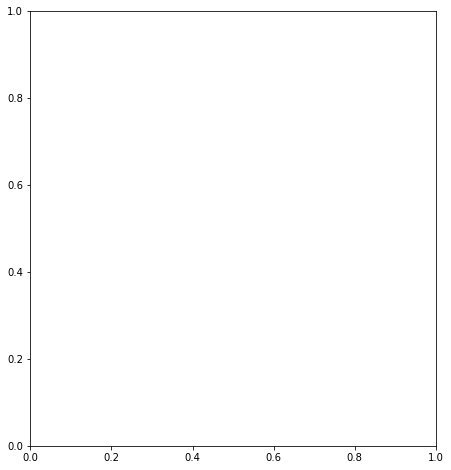

In [39]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

We can test our trained model on a new se